In [28]:
# Step 7: 2D diffusion

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy
%matplotlib inline

In [30]:
nx = 31
ny = 31
nt = 17
nu = 0.05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.25
dt = sigma * dx * dy / nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))

# u[int(0.5/dy):int(1/dy+1), int(0.5/dx):int(1/dx+1)] = 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

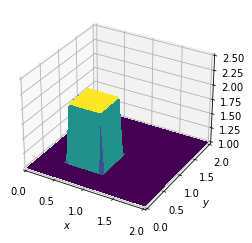

In [31]:
fig = pyplot.figure()
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [36]:
def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  

    for n in range(nt + 1):
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                         (nu * dt / dx ** 2) * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, :-2]) + 
                         (nu * dt / dy ** 2) * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
    fig = pyplot.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

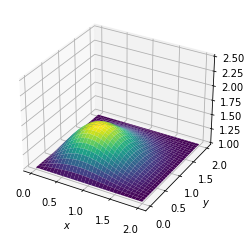

In [43]:
diffuse(50)

In [17]:
u = numpy.array([1,2,3,4,5])
print(u[:])
print(u[-1])
print(u[1:])
print(u[2:])
print(u[:-1])
print(u[1:-1])
print(u[0:-2])
print(u[:-2]) # same as ^

[1 2 3 4 5]
5
[2 3 4 5]
[3 4 5]
[1 2 3 4]
[2 3 4]
[1 2 3]
[1 2 3]
